In [5]:
using CMF
using PyPlot; plt = PyPlot
using PyCall

include("../src/separable.jl")
sep = Main.Separable

┌ Info: Precompiling CMF [db662885-8e4b-5931-925d-197754c06cb4]
└ @ Base loading.jl:1186


Main.Separable

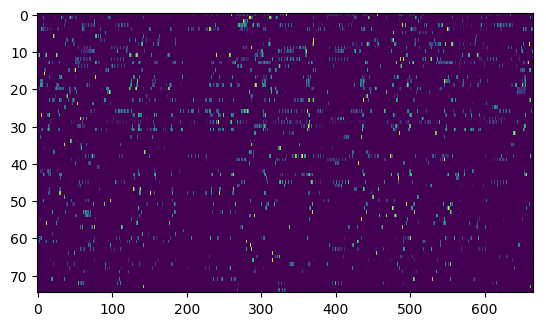

In [6]:
scipy_io = pyimport("scipy.io")
f = scipy_io.loadmat("../../cmf_data/MackeviciusData.mat")
data = f["NEURAL"]

plt.imshow(data, aspect=5)
plt.show()

In [20]:
res = CMF.fit_cnmf(
    data, K=3, L=25, alg=:hals, 
    max_iter=Inf, max_time=10
);

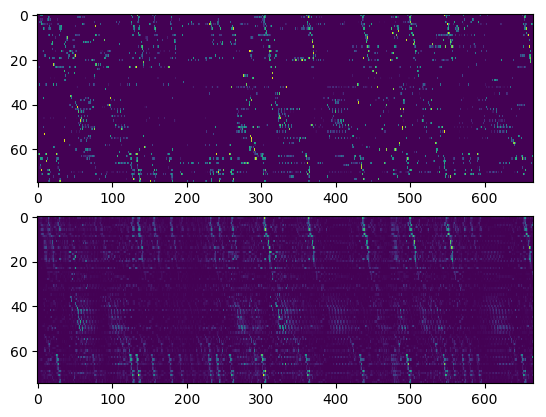

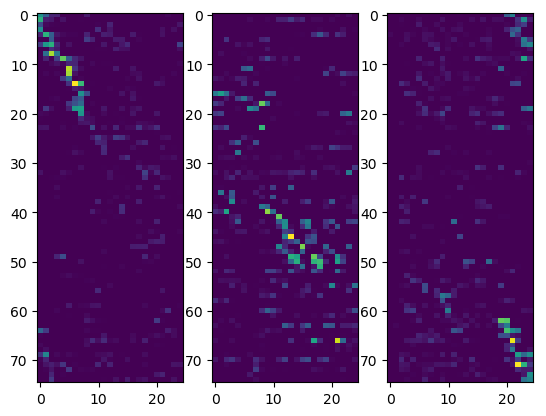

(Figure(PyObject <Figure size 640x480 with 3 Axes>), PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f81d9c30cc0>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f81da538a20>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f81da58c278>])

In [21]:
function plot_reconstruction(
        r,
        sort_units=true,
    )

    idx = sort_units ? CMF.sortperm(r) : 1:CMF.num_units(r)

    # Form model estimate
    est = CMF.tensor_conv(r.W, r.H)

    fig, ax = plt.subplots(2, 1)
    ax[1].imshow(r.data[idx, :], aspect=3)
    ax[2].imshow(est[idx, :], aspect=3)

    return fig, ax
end

function plot_Ws(
    r;
    sort_units=true,
    trueW=nothing
)

    data, W, H = r.data, r.W, r.H
    idx = sort_units ? CMF.sortperm(r) : 1:CMF.num_units(r)

    fig, ax = plt.subplots(1, CMF.num_components(r))
    for (k, a) in enumerate(ax)
        a.imshow(transpose(W[:, idx, k]), aspect="auto")
    end

    if ~isnothing(trueW)
        fig2, ax2 = plt.subplots(1, CMF.num_components(r))
        for (k, a) in enumerate(ax2)
            a.imshow(transpose(trueW[:, idx, k]), aspect="auto")
            a.set_yticks([])
        end
    end

    return fig, ax
end

plot_reconstruction(res)
plot_Ws(res)

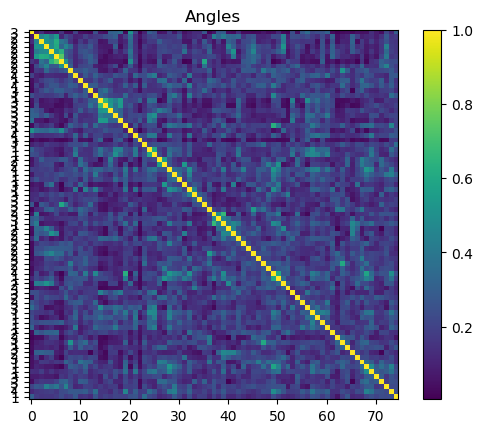

In [14]:
W, H = sep.fit_conv_separable(data, 3, 25, verbose=true, thresh=0.5);

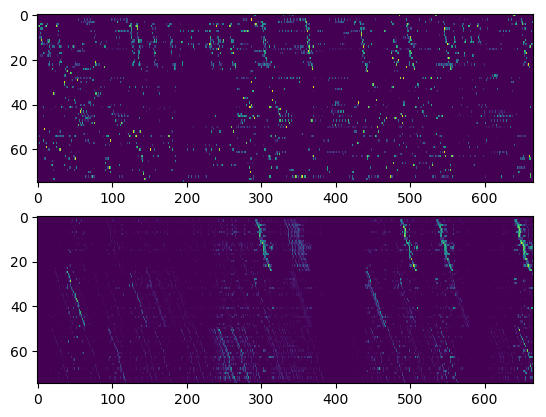

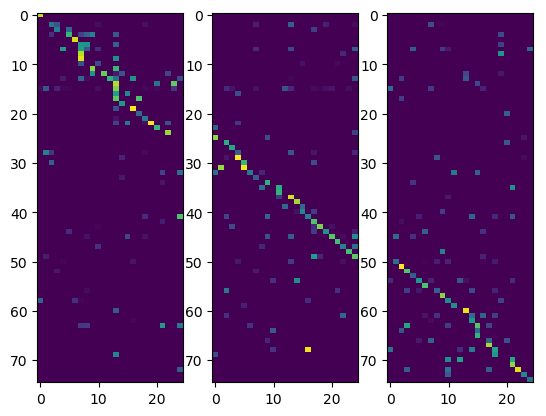

(Figure(PyObject <Figure size 640x480 with 3 Axes>), PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f81db1dac50>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f8208373b38>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f8208347780>])

In [15]:
sep_res = CMF.CNMF_results(data, W, H,
                           [], [],
                           0, 0, 0, 0, :sep)

# plt.figure()
# plt.imshow(CMF.tensor_conv(W, H)[CMF.sortperm(res), :], aspect=4)
# plt.show()

# plt.figure()
# plt.imshow(data[CMF.sortperm(res), :], aspect=4)
# plt.show()

plot_reconstruction(sep_res)
CMF.plot_Ws(sep_res)

In [30]:

#norm(CMF.tensor_conv(res.W, res.H) - data) / norm(data)

super_res = CMF.fit_cnmf(
    data, K=3, L=25, alg=:hals, 
    max_iter=Inf, max_time=10,
    initW=W, initH=H
);

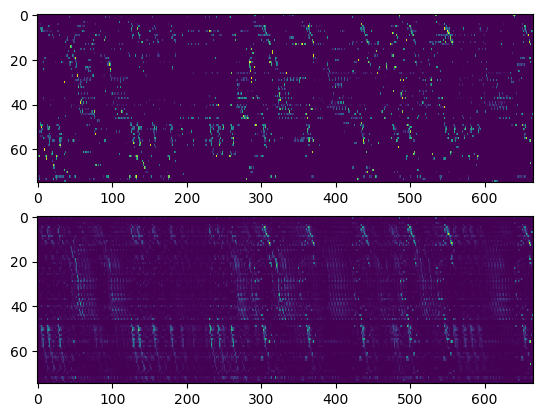

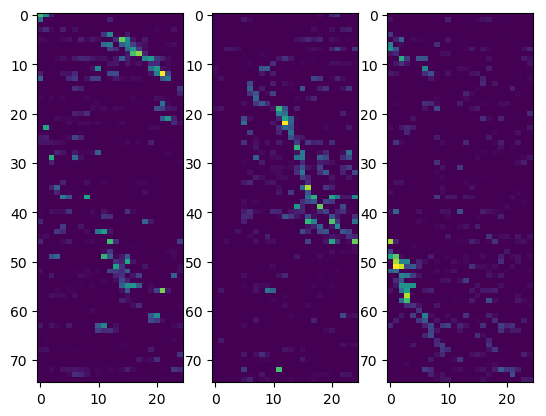

(Figure(PyObject <Figure size 640x480 with 3 Axes>), PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f81db16c128>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f81db4836a0>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f81db553c18>])

In [32]:
plot_reconstruction(super_res)
plot_Ws(super_res)